In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pred_data = pd.read_csv('pred_data.csv')

In [4]:
pred_data = pred_data[['customerid', 'predicted_churn_value']]

In [5]:
pred_data

,customerid,predicted_churn_value
0,3668-QPYBK,0.372599
1,9237-HQITU,0.542874
2,9305-CDSKC,0.520716
3,7892-POOKP,0.265623
4,0280-XJGEX,0.239110
...,...,...
7038,2569-WGERO,0.027261
7039,6840-RESVB,0.041007
7040,2234-XADUH,0.061672
7041,4801-JZAZL,0.283509


<Axes: xlabel='predicted_churn_value', ylabel='Count'>

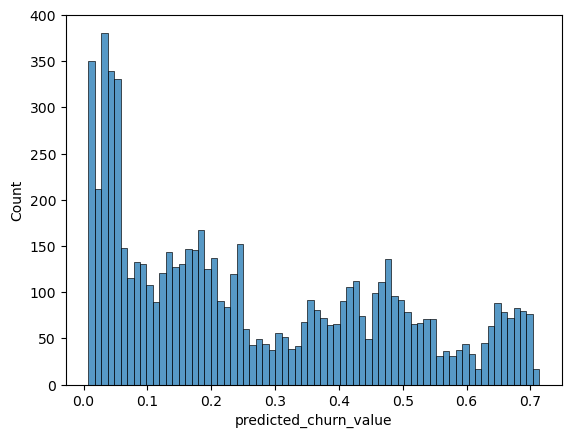

In [25]:
sns.histplot(pred_data['predicted_churn_value'], bins = 70)

0-0.1 very low risk

0.1-0.4 low risk

0.4-0.6 medium risk

0.6-0.9 high risk

0.9-1 very high risk

In [9]:
import random

def ExpectedChurn(df, simulationNum = 1000):
    probs = df['predicted_churn_value'].values
    numCustomers = len(probs)
    results = np.zeros((simulationNum, numCustomers))
    lossDist = np.zeros(simulationNum)
    for i in range(simulationNum):
        for index in range(numCustomers):
            rand = random.uniform(0,1)
            prob = df['predicted_churn_value'].loc[index]
            if rand <= prob:
                results[i][index] = 1
        lossDist[i] = results[i].mean()
    expectedCustomerChurn = lossDist.mean()
    return expectedCustomerChurn, lossDist

In [10]:
expectvalue, pdf = ExpectedChurn(pred_data)

In [18]:
def ExpectedChurnV2(df, simulationNum = 100000):
    probs = df['predicted_churn_value'].values
    numCustomers = len(probs)

    randomMatrix = np.random.rand(simulationNum, numCustomers)

    churnMatrix = (randomMatrix <= probs).astype(int)

    lossDist = churnMatrix.mean(axis=1)

    expectedCustomerChurn = lossDist.mean()

    lowerBound99, upperBound99 = np.percentile(lossDist, [0.5, 99.5])
    
    return expectedCustomerChurn, lossDist, lowerBound99, upperBound99

In [19]:
expectedvaluev2, pdfv2, lb99, ub99 = ExpectedChurnV2(pred_data)

In [13]:
print((expectvalue, expectedvaluev2))
print('\n')

(np.float64(0.26601490841970754), np.float64(0.26608646883430354))




<Axes: xlabel='predicted_churn_value', ylabel='Count'>

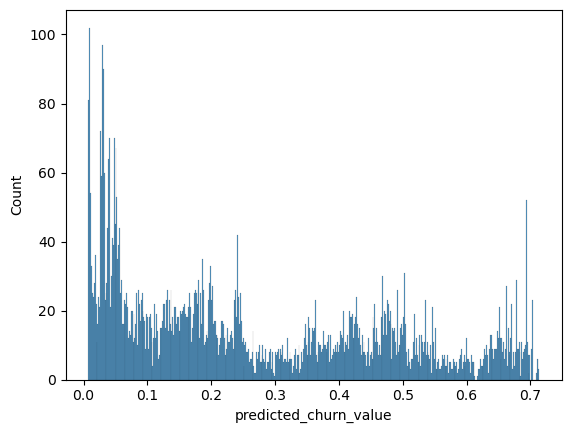

In [22]:
sns.histplot(pred_data['predicted_churn_value'], bins =500)

<Axes: ylabel='Count'>

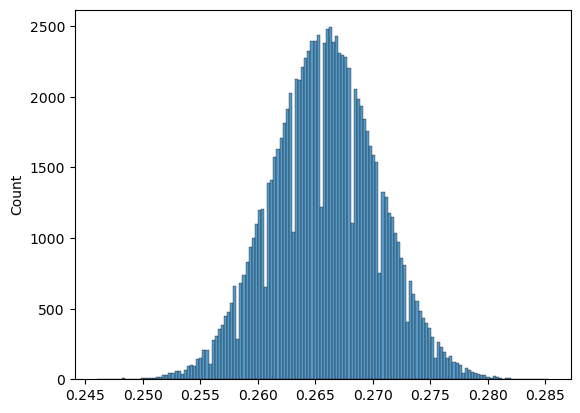

In [17]:
sns.histplot(pdfv2)

Bucketisation

In [36]:
bucketval = [0, 10, 40, 60, 90, 100]
bucketlabel = ['Very Low Risk', 'Low Risk', 'Medium Risk', 'High Risk', 'Very High Risk']

pred_data_final = pred_data.copy()

pred_data_final['Likelihood of Churn [%]'] = pred_data_final['predicted_churn_value'] * 100

pred_data_final['Risk Label'] = pd.cut(pred_data_final['Likelihood of Churn [%]'], bins=bucketval, labels=bucketlabel, right=False)

In [37]:
pred_data_final

,customerid,predicted_churn_value,labeled_risk,Likelihood of Churn [%],Risk Label
0,3668-QPYBK,0.372599,Low Risk,37.259907,Low Risk
1,9237-HQITU,0.542874,Medium Risk,54.287374,Medium Risk
2,9305-CDSKC,0.520716,Medium Risk,52.071560,Medium Risk
3,7892-POOKP,0.265623,Low Risk,26.562348,Low Risk
4,0280-XJGEX,0.239110,Low Risk,23.911020,Low Risk
...,...,...,...,...,...
7038,2569-WGERO,0.027261,Very Low Risk,2.726094,Very Low Risk
7039,6840-RESVB,0.041007,Very Low Risk,4.100697,Very Low Risk
7040,2234-XADUH,0.061672,Very Low Risk,6.167231,Very Low Risk
7041,4801-JZAZL,0.283509,Low Risk,28.350880,Low Risk


In [38]:
pred_data_final = pred_data_final.rename(columns = {'customerid': 'Customer ID'})

pred_data_final_output = pred_data_final.drop(columns=['predicted_churn_value', 'labeled_risk'])

In [40]:
pred_data_final_output.to_csv('Pred_Data_Submission.csv', index=False)